## 线性回归

### 什么是线性回归？

线性：两个变量之间的关系量之间是一次函数关系的，称为线性。

非线性：两个函数变量之间的关系量之间不是一次函数关系的，成为非线性。

回归：测量事物的时候因为可观条件所限，求得都是测量值，而不是真实值，为了得到真实值，无限次的进行测量，最后通过测量数据计算得到回归到真实值。

一般表达式为$y = wx + b$

MSE损失函数为 $J = \frac {1} {N} \sum_{i=1}^{N} {(y^{'} - y)}^2$

利用梯度下降法找到最小值点，将w和b求解出来。

### 过拟合、欠拟合如何解决？

使用正则化项，给loss函数加上参数项，正则化有L1正则化、L2正则化、ElasticNet。

加入正则化项好处：
- 控制参数幅度，不会出现过大或者过小的值。
- 限制参数搜索空间
- 解决欠拟合和过拟合的问题
- 参数的求解空间添加了约束，限制了模型的复杂度
- L1 正则化鼓励产生稀疏的权重，L2鼓励产生小二分散的权重

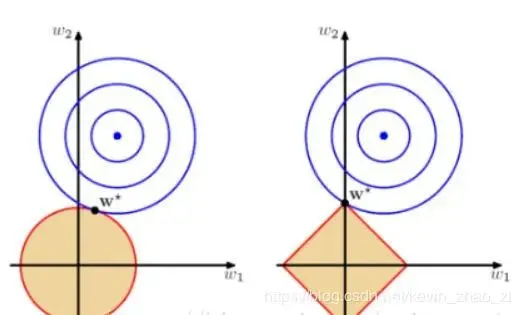

参考 [L1正则化和L2正则化](https://zhuanlan.zhihu.com/p/144286564)

#### 什么是L2正则化（岭回归）

表达式为：
$ J = J_0 + \lambda \sum_{w}^{} {w^2}$

其中$J_0$  为之前的损失函数

#### 什么场景下使用L2正则化

只要数据线性相关，使用LinearRegression拟合的不是很好，可以考虑正则化。如果输入特征的维度很高,而且是稀疏线性关系的话， 岭回归就不太合适,考虑使用Lasso回归。

#### 什么是L1正则化（Lasso回归）

表达式为$J = J_0 + \lambda (|w_1| + |w_2|)$


#### 什么场景下使用L1正则化

L1正则化(Lasso回归)可以使得一些特征的系数变小,甚至还使一些绝对值较小的系数直接变为0，从而增强模型的泛化能力。

对于高的特征数据,尤其是线性关系是稀疏的，就采用L1正则化(Lasso回归),或者是要在一堆特征里面找出主要的特征，那么L1正则化(Lasso回归)更是首选了


$$
\begin{align}

\end{align}
$$


In [1]:
'''
从给定的房屋基本信息以及房屋销售信息等，建立一个回归模型预测房屋的销售价格。 数据下载请点击：下载，密码：mfqy。

数据说明: 数据主要包括2014年5月至2015年5月美国King County的房屋销售价格以及房屋的基本信息。 
          数据分为训练数据和测试数据，分别保存在kc_train.csv和kc_test.csv两个文件中。
          其中训练数据主要包括10000条记录，14个字段，主要字段说明如下： 
            第一列“销售日期”：2014年5月到2015年5月房屋出售时的日期
            第二列“销售价格”：房屋交易价格，单位为美元，是目标预测值
            第三列“卧室数”：房屋中的卧室数目
            第四列“浴室数”：房屋中的浴室数目
            第五列“房屋面积”：房屋里的生活面积
            第六列“停车面积”：停车坪的面积
            第七列“楼层数”：房屋的楼层数
            第八列“房屋评分”：King County房屋评分系统对房屋的总体评分
            第九列“建筑面积”：除了地下室之外的房屋建筑面积
            第十列“地下室面积”：地下室的面积
            第十一列“建筑年份”：房屋建成的年份
            第十二列“修复年份”：房屋上次修复的年份
            第十三列"纬度"：房屋所在纬度
            第十四列“经度”：房屋所在经度
          测试数据主要包括3000条记录，13个字段，跟训练数据的不同是测试数据并不包括房屋销售价格，
          学员需要通过由训练数据所建立的模型以及所给的测试数据，得出测试数据相应的房屋销售价格预测值。
'''

import pandas as pd
import numpy as np
import random
random.seed(42)
np.random.seed(42)

housing = pd.read_csv('data/kc_train.csv')
testing = pd.read_csv('data/kc_test.csv')

from sklearn.preprocessing import MinMaxScaler


minmax_scaler = MinMaxScaler()
minmax_scaler.fit(housing)
scaler_housing = minmax_scaler.transform(housing)
scaler_housing = pd.DataFrame(scaler_housing, columns=housing.columns)

train_housing = housing.iloc[:, [col for col in range(len(housing.columns)) if col != 1]]
target_housing = housing.iloc[:, 1]



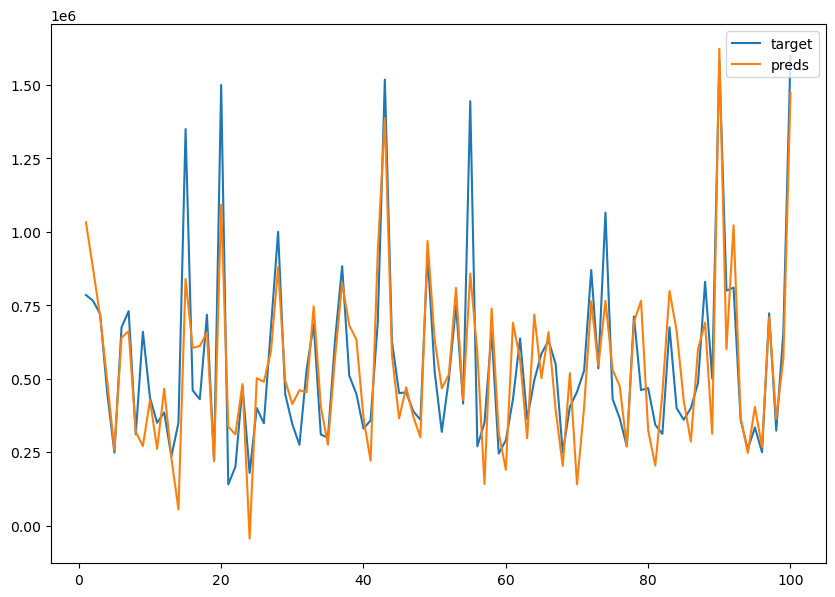

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plot



LR_reg = LinearRegression()
LR_reg.fit(train_housing, target_housing)

preds = LR_reg.predict(train_housing)
mse = mean_squared_error(preds, target_housing)


plot.figure(figsize=(10,7))       #画布大小
num=100
x=np.arange(1,num+1)              #取100个点进行比较
plot.plot(x,target_housing[:num],label='target')      #目标取值
plot.plot(x,preds[:num],label='preds')        #预测取值
plot.legend(loc='upper right')  #线条显示位置
plot.show()




0.0 1.0 (9999, 13)
0.0 1.0 (9999,)
0.12923486360064648
0.0005072928816113782
0.0003372664788439003
0.0003259536924943483
0.00032579913271655475
0.000326487293452828
0.00032694067513497447
0.00032718485725541195
0.00032732169099055405
0.0003274115759579435


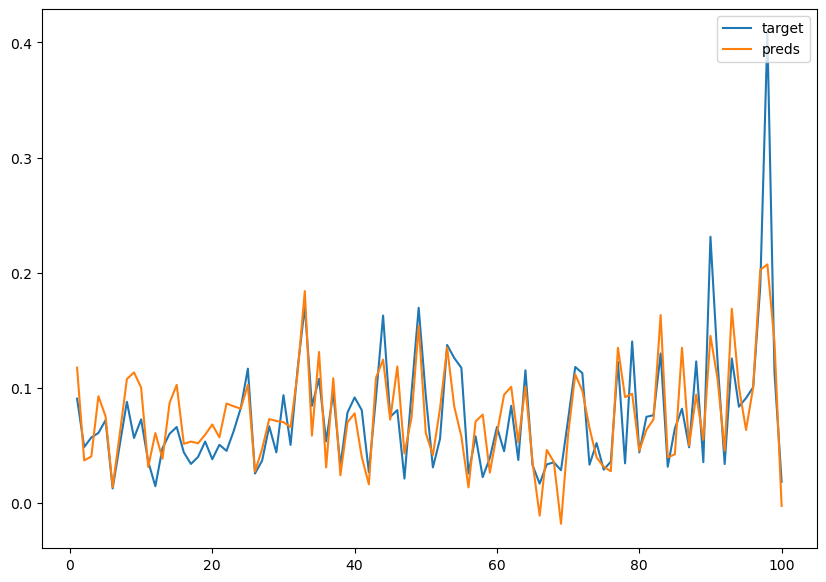

In [29]:

from sklearn.preprocessing import StandardScaler

feature_scaler = MinMaxScaler()
price_scaler = MinMaxScaler()
feature_scaler.fit(train_housing.values)
feature_housing = feature_scaler.transform(train_housing.values)


price_scaler.fit(target_housing.values.reshape(-1, 1))
price_housing = price_scaler.transform(target_housing.values.reshape(-1, 1)).reshape(-1)
# testing_housing = feature_scaler.transform(testing.values)

# feature_housing_np = feature_housing.values
# price_housing_np = price_housing.values
# testing_housing_np = testing_housing.values

print(feature_housing.min(), feature_housing.max(), feature_housing.shape)
print(price_housing.min(), price_housing.max(), price_housing.shape)
# print(testing_housing.min(), testing_housing.max(), testing_housing.shape)
iters = 1000
batch_size = 64
learning_rate = 1e-2
random.seed(42)
np.random.seed(42)
weight = np.random.randn(13,)
bias = np.random.randn(1, )
random.seed(10016)
np.random.seed(10016)

M = feature_housing.shape[0]


def forward(x, w, b):
    return x @ w + b

def backward(input, weight, bias, predict, expect, lr):
    batch_size = input.shape[0]
    w_gradient = -(2/batch_size) * (expect - predict).T @ input
    b_gradient = -(2/batch_size) * (expect-predict).T @ np.ones(shape=[batch_size,1])
    weight = weight - lr * w_gradient
    bias = bias - lr * b_gradient
    return weight, bias


for iter in range(iters):
    for i in range(0, (M // 16 * 16), batch_size):
        batch_feature = feature_housing[i: i + batch_size]
        batch_target = price_housing[i: i + batch_size]
        batch_predict = forward(batch_feature, weight, bias)
        #if iter % 10 == 0 and i == 0:
        #    print(batch_target, batch_predict)
        loss = np.sum(np.power(batch_predict - batch_target, 2)) / batch_size / 2
        weight, bias = backward(batch_feature, weight, bias, batch_predict, batch_target, learning_rate)
    if iter % 100 == 0:
        print(loss)

# 1e-6 0.12951326570148242
# 1e-5 0.021210483825909225
# 1e-4 0.0005172319371911894
# 1e-3 0.0003227128013457484
# 1e-2 0.0003274115759579435
num=100
random_indices = np.random.choice(feature_housing.shape[0], size=num, replace=False)
random_features = feature_housing[random_indices]
random_targets = price_housing[random_indices]
random_predicts = forward(random_features, weight, bias)

plot.figure(figsize=(10,7))       #画布大小

x=np.arange(1,num+1)              #取100个点进行比较
plot.plot(x,random_targets,label='target')      #目标取值
plot.plot(x,random_predicts,label='preds')        #预测取值
plot.legend(loc='upper right')  #线条显示位置
plot.show()

